In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

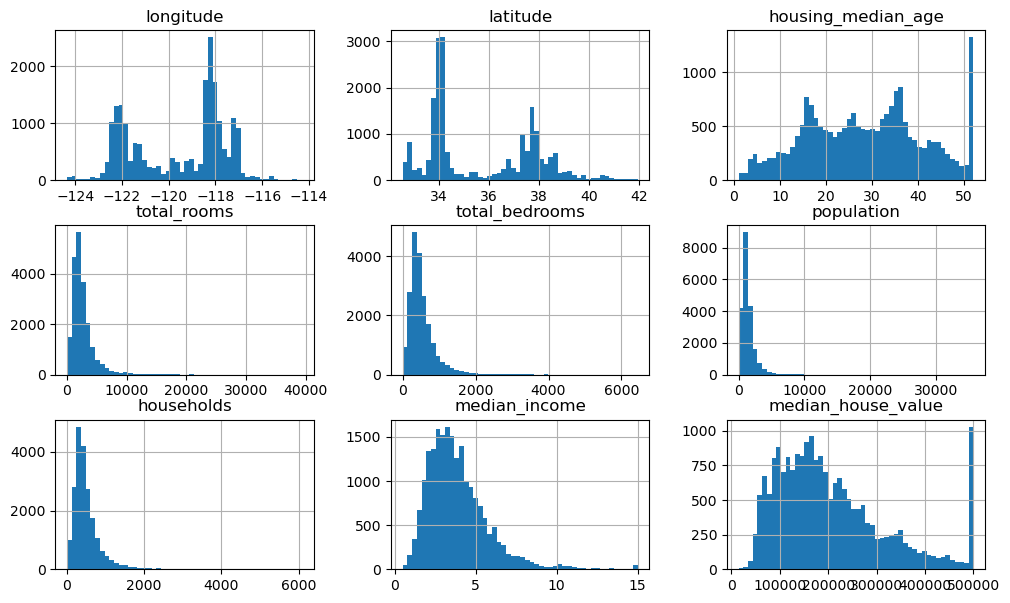

In [7]:
df.hist(bins=50, figsize=(12, 7));

C:\Users\User\AppData\Local\Temp\ipykernel_11740\2004828398.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


<Figure size 1400x600 with 0 Axes>

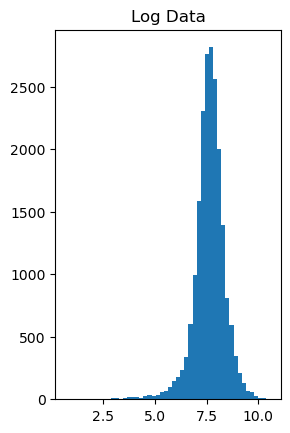

In [8]:
plt.figure(figsize=(14, 6))
plt.subplots(121)
plt.title('Original Data')
plt.hist(df['total_rooms'], bins=50)
plt.subplot(122)
plt.title('Log Data')
plt.hist(np.log(df['total_rooms']), bins=50);

In [9]:
df['total_rooms'] = np.log(df['total_rooms'])
df['total_bedrooms'] = np.log(df['total_bedrooms'])
df['population'] = np.log(df['population'])
df['households'] = np.log(df['households'])

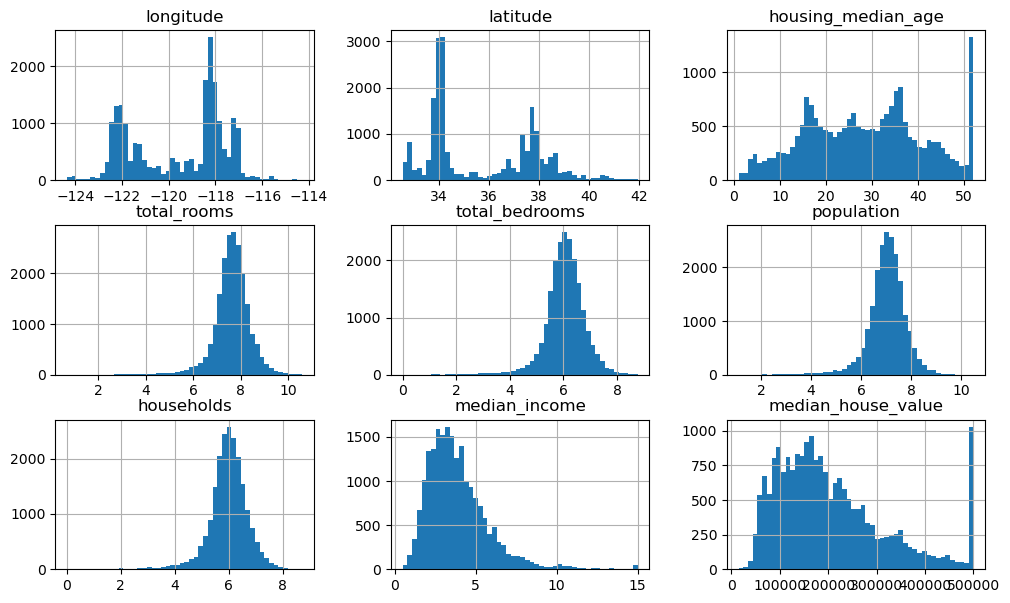

In [10]:
df.hist(bins=50, figsize=(12, 7));

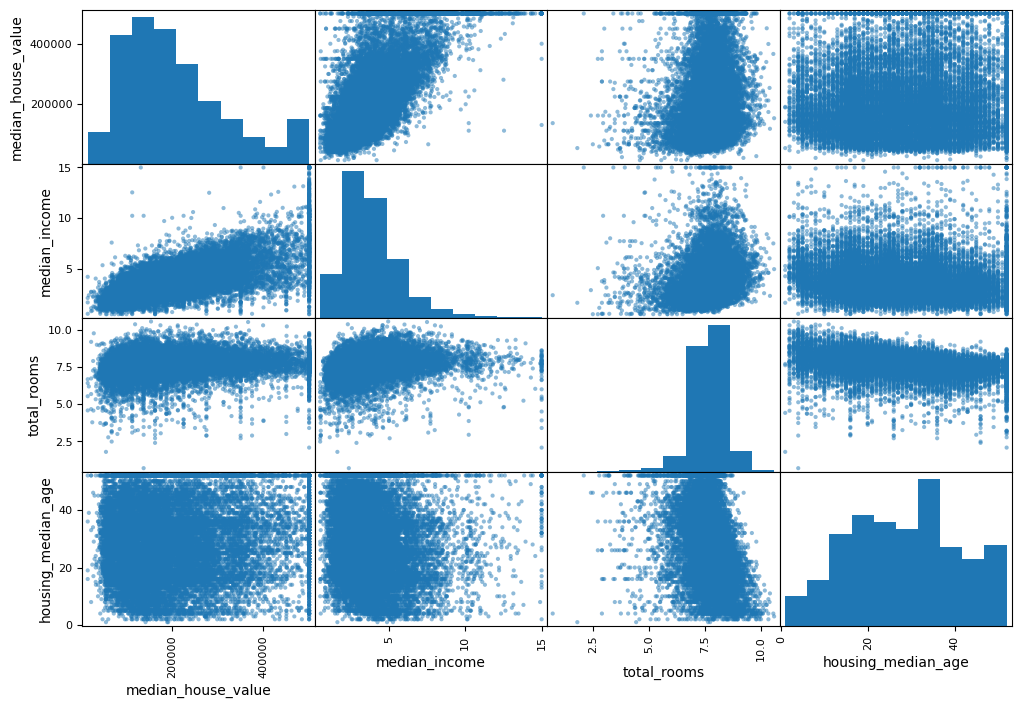

In [11]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12, 8));

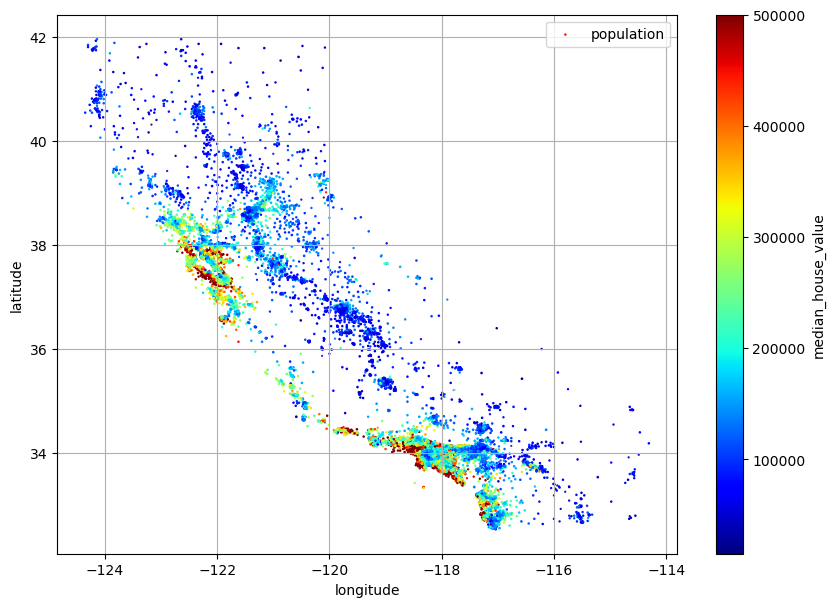

In [12]:
df.plot(kind='scatter',
        x = 'longitude',
        y = 'latitude',
        grid = True,
        s=df['population']/10,
        label="population",
        c = 'median_house_value',
        cmap = 'jet',
        colorbar = True,
        legend = True,
        figsize=(10, 7));

# Machine Learning

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,INLAND


In [14]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
if df['median_house_value'].isna().sum() > 0:
    df.dropna(subset='median_house_value')

In [16]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].copy()

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy='median')

In [19]:
df['total_bedrooms'] = imputer.fit_transform(pd.DataFrame(df['total_bedrooms']))

In [20]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [22]:
onehot = OneHotEncoder(sparse_output=False)

In [23]:
onehot_result = onehot.fit_transform(pd.DataFrame(df['ocean_proximity']))

In [24]:
column_names = onehot.get_feature_names_out()

In [25]:
ocean_df = pd.DataFrame(onehot_result, columns=column_names)

In [26]:
ocean_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [27]:
final_df = pd.concat([df, ocean_df], axis=1)

In [28]:
final_df.drop('ocean_proximity', axis=1, inplace=True)

In [29]:
final_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [30]:
#X = final_df

In [31]:
#from sklearn.model_selection import train_test_split

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#len(X_train), len(X_test)

In [34]:
#X_train

In [35]:
#y_train

In [36]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [37]:
#from sklearn.ensemble import RandomForestRegressor

In [38]:
#rfr = RandomForestRegressor()

In [39]:
#rfr.fit(X_train, y_train)

In [40]:
#rfr.score(X_train, y_train)

In [41]:
#preds = pd.DataFrame(rfr.predict(X_test))

In [42]:
#preds

In [43]:
#y_test

In [44]:
house_listing = pd.read_csv("HouseListings-Top45Cities-10292023-kaggle.csv", encoding="latin1")

In [45]:
house_listing

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [46]:
house_listing.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [47]:
house_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [48]:
house_listing.isna().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

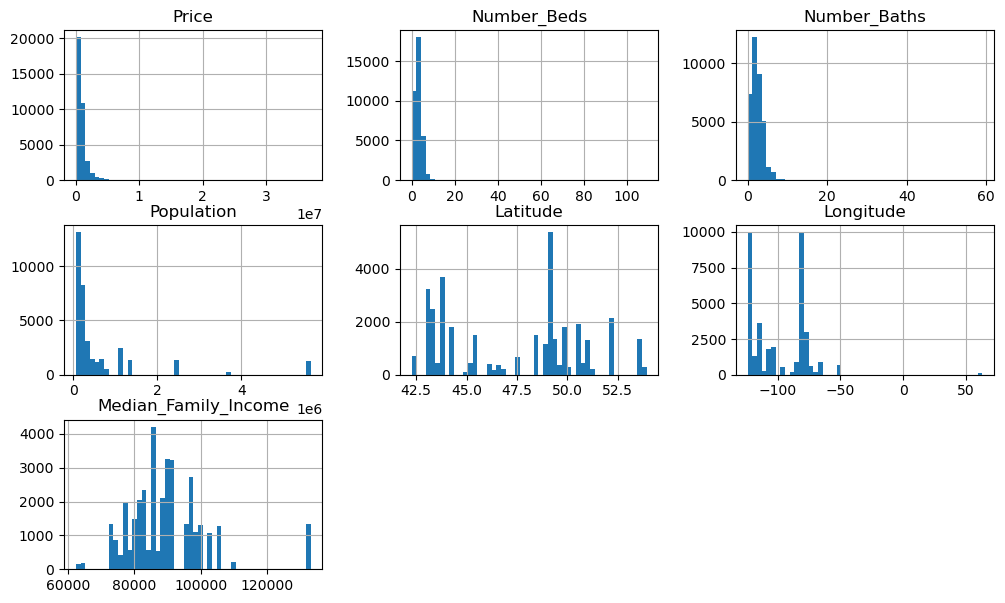

In [49]:
house_listing.hist(bins=50, figsize=(12, 7));

C:\Users\User\AppData\Local\Temp\ipykernel_15812\3664711784.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


<Figure size 1400x600 with 0 Axes>

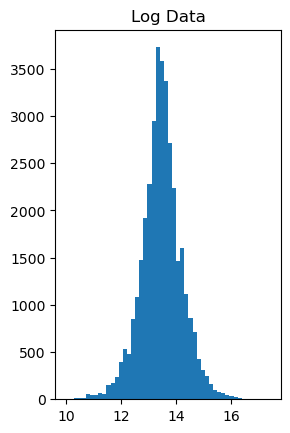

In [50]:
plt.figure(figsize=(14, 6))
plt.subplots(121)
plt.title('Original Data')
plt.hist(house_listing['Price'], bins=50)
plt.subplot(122)
plt.title('Log Data')
plt.hist(np.log(house_listing['Price']), bins=50);

In [51]:
house_listing['Price'] = np.log(house_listing['Price'] + 1)
house_listing['Number_Beds'] = np.log(house_listing['Number_Beds'] + 1)
house_listing['Number_Baths'] = np.log(house_listing['Number_Baths'] + 1)

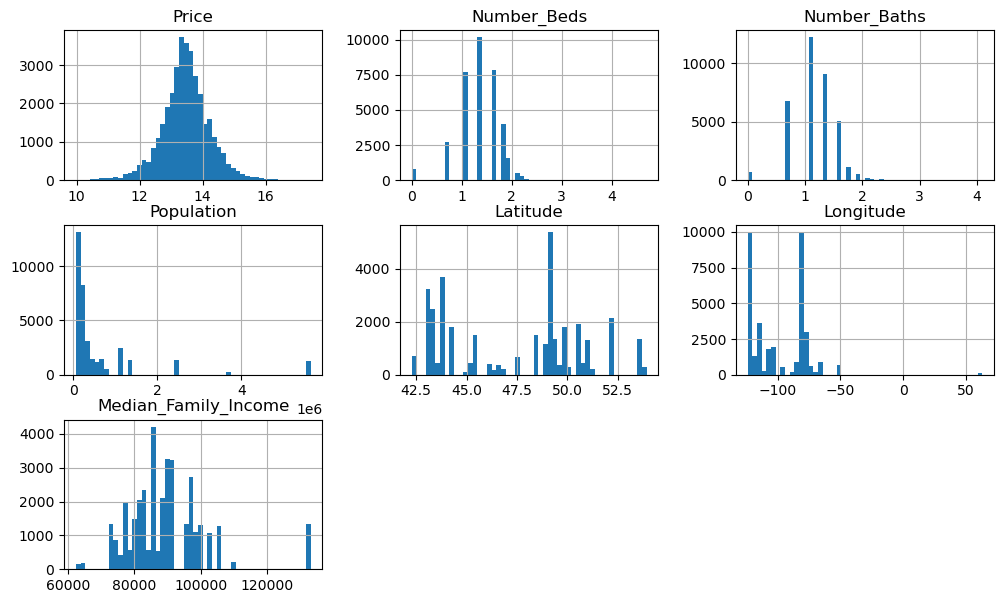

In [52]:
house_listing.hist(bins=50, figsize=(12, 7));

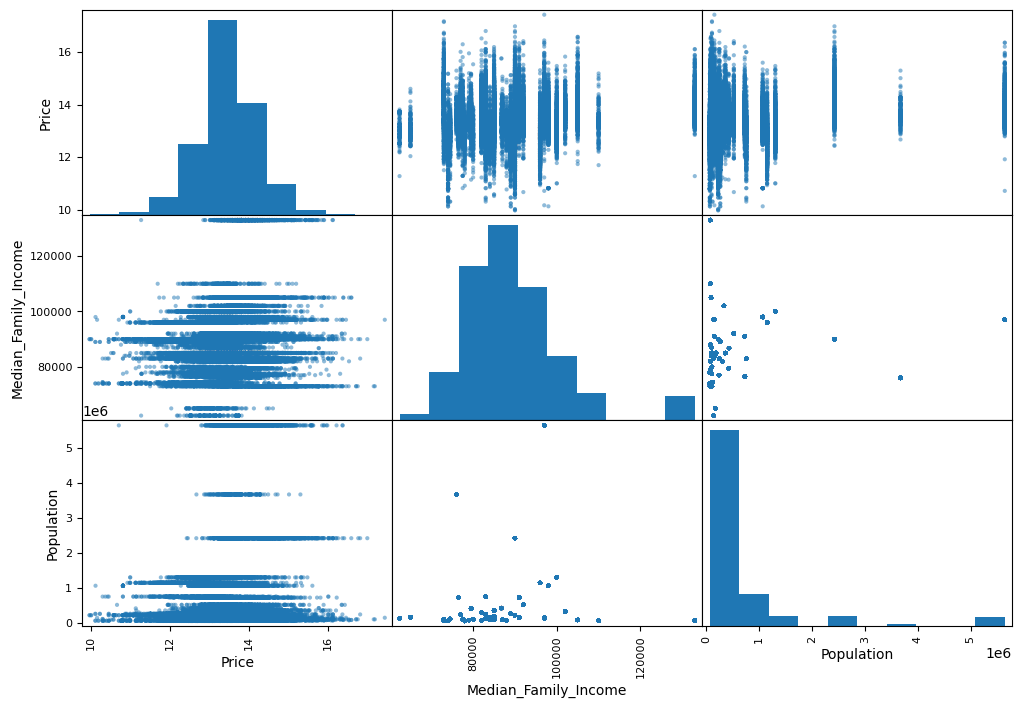

In [53]:
from pandas.plotting import scatter_matrix
attributes = ['Price', 'Median_Family_Income', 'Population']
scatter_matrix(house_listing[attributes], figsize=(12, 8));

C:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


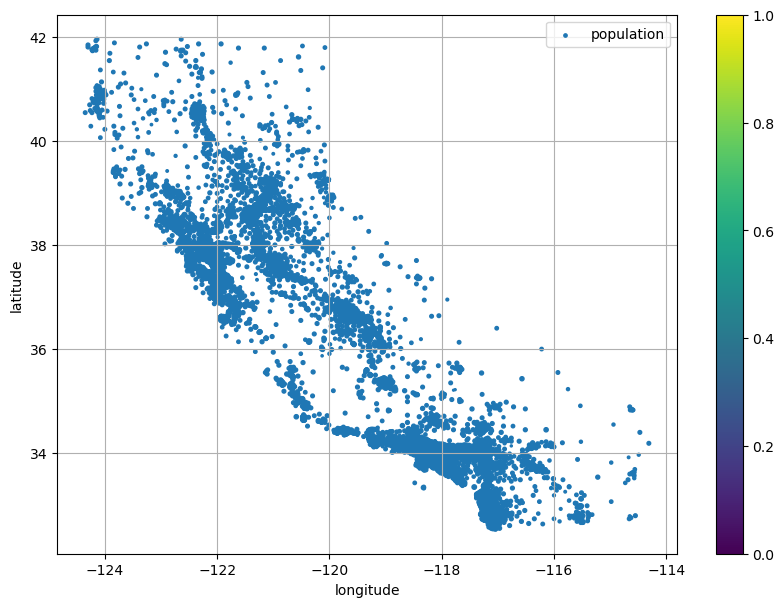

In [54]:
df.plot(kind='scatter',
        x = 'longitude',
        y = 'latitude',
        grid = True,
        s=df['population']/1,
        label="population",
        cmap = 'jet',
        colorbar = True,
        legend = True,
        figsize=(10, 7));

# Machine Learning Part

In [55]:
house_listing

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,13.566922,#318 -20 SOUTHPORT ST,1.386294,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,13.592367,#818 -60 SOUTHPORT ST,1.386294,0.693147,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,13.592243,#714 -859 THE QUEENSWAY,1.098612,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,13.997833,275 MORTIMER AVE,1.609438,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,13.413242,#420 -388 RICHMOND ST,0.693147,0.693147,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,12.994305,301 60 Walter Havill Drive,1.098612,1.098612,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,15.759991,1160 Rockcliffe Street,1.791759,1.791759,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,12.947774,212 60 Walter Havill Drive,1.098612,1.098612,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,13.764113,10 Idlewylde Road,1.386294,0.693147,Nova Scotia,431479,44.8857,63.1005,86753.0


In [56]:
X = house_listing.drop('Price', axis=1)
y = house_listing['Price']

In [57]:
X.isna().sum()

City                    0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [58]:
y.isna().sum()

0

In [59]:
one_hot_enc = OneHotEncoder(sparse_output=False)

In [60]:
onehot_res = one_hot_enc.fit_transform(pd.DataFrame(house_listing['Province']))

In [61]:
get_columns = one_hot_enc.get_feature_names_out()

In [62]:
province_df = pd.DataFrame(onehot_res, columns=get_columns)

In [63]:
house_imputer = SimpleImputer(strategy='median')

In [64]:
house_listing['Number_Baths'] = house_imputer.fit_transform(pd.DataFrame(house_listing['Number_Baths']))

In [65]:
X = pd.concat([house_listing, province_df], axis=1)

In [66]:
X

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,Toronto,13.566922,#318 -20 SOUTHPORT ST,1.386294,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Toronto,13.592367,#818 -60 SOUTHPORT ST,1.386294,0.693147,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Toronto,13.592243,#714 -859 THE QUEENSWAY,1.098612,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Toronto,13.997833,275 MORTIMER AVE,1.609438,1.098612,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Toronto,13.413242,#420 -388 RICHMOND ST,0.693147,0.693147,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,12.994305,301 60 Walter Havill Drive,1.098612,1.098612,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35764,Halifax,15.759991,1160 Rockcliffe Street,1.791759,1.791759,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35765,Halifax,12.947774,212 60 Walter Havill Drive,1.098612,1.098612,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35766,Halifax,13.764113,10 Idlewylde Road,1.386294,0.693147,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [72]:
len(X_train), len(X_test)

(28614, 7154)

In [73]:
X_train

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
10541,London,13.367661,325 REYNOLDS Road,1.609438,1.098612,Ontario,423369,42.9836,-81.2497,79500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7912,Hamilton,13.415034,247 CANNON ST E,1.791759,1.098612,Ontario,729560,43.2567,-79.8692,91000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3728,Calgary,12.487489,2607,1.098612,0.693147,Alberta,1306784,51.0500,-114.0667,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27974,Prince George,12.994530,3617 JAMES DRIVE,1.386294,1.098612,British Columbia,76708,53.9169,-122.7494,88000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23481,Peterborough,13.251637,595 BOLIVAR ST,1.386294,1.098612,Ontario,84793,44.3000,-78.3167,79000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,Vancouver,13.566922,404-2455 KINGSWAY,1.098612,0.693147,British Columbia,2426160,49.2500,-123.1000,90000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34140,Saskatoon,13.217494,326 Chelsom MANOR,1.386294,1.386294,Saskatchewan,266141,52.1333,-106.6833,89000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13927,Victoria,14.074022,1107-760 Johnson St,0.693147,0.693147,British Columbia,363222,48.4283,-123.3647,85000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
919,Toronto,13.215856,#214 -40 GLEN RD,0.693147,0.693147,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
y_train

10541    13.367661
7912     13.415034
3728     12.487489
27974    12.994530
23481    13.251637
           ...    
2583     13.566922
34140    13.217494
13927    14.074022
919      13.215856
10742    13.592243
Name: Price, Length: 28614, dtype: float64

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28614, 19), (7154, 19), (28614,), (7154,))

In [79]:
X_train.drop(['City', 'Address', 'Province'], axis=1, inplace=True)

In [80]:
X_train

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
10541,13.367661,1.609438,1.098612,423369,42.9836,-81.2497,79500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7912,13.415034,1.791759,1.098612,729560,43.2567,-79.8692,91000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3728,12.487489,1.098612,0.693147,1306784,51.0500,-114.0667,100000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27974,12.994530,1.386294,1.098612,76708,53.9169,-122.7494,88000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23481,13.251637,1.386294,1.098612,84793,44.3000,-78.3167,79000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,13.566922,1.098612,0.693147,2426160,49.2500,-123.1000,90000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34140,13.217494,1.386294,1.386294,266141,52.1333,-106.6833,89000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13927,14.074022,0.693147,0.693147,363222,48.4283,-123.3647,85000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
919,13.215856,0.693147,0.693147,5647656,43.7417,-79.3733,97000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfr = RandomForestRegressor()

In [83]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
rfr.score(X_train, y_train)

0.9999982040660391